In [ ]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)  #The findFiles function uses glob.glob to find files matching a specified pattern.

print(findFiles('data.zip'))
!unzip data.zip

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):   #The unicodeToAscii function converts Unicode strings to ASCII, removing diacritics and non-ASCII characters.
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) #Normalization form decomposition
        if unicodedata.category(c) != 'Mn' #The list comprehension filters out characters that are diacritical marks
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n') #The file is opened with UTF-8 encoding, read into a single string, stripped of leading and trailing whitespace, and split into lines.
    return [unicodeToAscii(line) for line in lines]  #returns the lines in ASCII format.

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)


['data.zip']
Archive:  data.zip
replace data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/eng-fra.txt        
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  
Slusarski


In [ ]:
all_categories

['Greek',
 'Portuguese',
 'Russian',
 'Vietnamese',
 'French',
 'Korean',
 'English',
 'Dutch',
 'Japanese',
 'Spanish',
 'Arabic',
 'German',
 'Czech',
 'Scottish',
 'Irish',
 'Polish',
 'Chinese',
 'Italian']

In [ ]:
category_lines

{'Greek': ['Adamidis',
  'Adamou',
  'Agelakos',
  'Akrivopoulos',
  'Alexandropoulos',
  'Anetakis',
  'Angelopoulos',
  'Antimisiaris',
  'Antipas',
  'Antonakos',
  'Antoniadis',
  'Antonopoulos',
  'Antonopoulos',
  'Antonopoulos',
  'Arvanitoyannis',
  'Avgerinos',
  'Banos',
  'Batsakis',
  'Bekyros',
  'Belesis',
  'Bertsimas',
  'Bilias',
  'Blades',
  'Bouloukos',
  'Brisimitzakis',
  'Bursinos',
  'Calogerakis',
  'Calpis',
  'Chellos',
  'Christakos',
  'Christodoulou',
  'Christou',
  'Chrysanthopoulos',
  'Chrysanthopoulos',
  'Comino',
  'Close',
  'Close',
  'Close',
  'Close',
  'Close',
  'Close',
  'Close',
  'Close',
  'Dalianis',
  'Danas',
  'Dasios',
  'Demakis',
  'Demarchis',
  'Demas',
  'Demetrious',
  'Dertilis',
  'Diakogeorgiou',
  'Dioletis',
  'Dounias',
  'Dritsas',
  'Drivakis',
  'Eatros',
  'Egonidis',
  'Eliopoulos',
  'Forakis',
  'Fotopoulos',
  'Fourakis',
  'Frangopoulos',
  'Galanopoulos',
  'Garofalis',
  'Gavril',
  'Gavrilopoulos',
  'Georgea

In [ ]:
print(category_lines['Italian'][:5])


['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [ ]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)    #Weight initialization
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)       #log of the softmax function, all probabilities will be of the value  e^(output value)

    def forward(self, input, hidden):             #forward pass
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):        #initializing the hidden state
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9010, -2.9170, -2.8068, -2.9360, -2.8759, -2.8882, -2.9229, -2.9891,
         -2.7864, -2.8149, -2.7942, -2.9029, -2.9032, -3.0000, -2.8102, -2.8633,
         -2.9924, -2.9632]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
def categoryFromOutput(output):
    # Get the top category index from the model's output
    top_n, top_i = output.topk(1)  # Returns the highest value and its index
    category_i = top_i[0].item()   # Convert the top index tensor to a Python integer
    return all_categories[category_i], category_i  # Return the category name and its index

# Example usage: print the category name and index for the given output
print(categoryFromOutput(output))


('Japanese', 8)


In [ ]:
import random

# Function to choose a random element from a list ``l``
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Function to create a random training example
def randomTrainingExample():
    # Choose a random category (language)
    category = randomChoice(all_categories)

    # Choose a random line (name) from the chosen category
    line = randomChoice(category_lines[category])

    # Create a tensor for the category (as an index in all_categories)
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)

    # Convert the line to a tensor using the lineToTensor function
    line_tensor = lineToTensor(line)

    # Return the category, line, and their respective tensors
    return category, line, category_tensor, line_tensor

# Loop to print 10 random training examples
for i in range(10):
    # Get a random training example
    category, line, category_tensor, line_tensor = randomTrainingExample()

    # Print the category and line
    print('category =', category, '/ line =', line)


category = Spanish / line = Jasso
category = Polish / line = Sokal
category = Korean / line = Chang
category = Scottish / line = Fraser
category = French / line = Victor
category = Polish / line = Wojewodka
category = Greek / line = Theofilopoulos
category = Korean / line = Gu
category = Scottish / line = Maclean
category = English / line = Ballantyne


In [ ]:
criterion = nn.NLLLoss()

In [ ]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate (this is done instead of optimizer.step())
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [ ]:
import time
import math

# Number of iterations to train
n_iters = 100000

# Print progress every ``print_every`` iterations
print_every = 5000

# Record loss for plotting every ``plot_every`` iterations
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

# Function to calculate the elapsed time since ``since`` in minutes and seconds
def timeSince(since):
    now = time.time()  # Current time
    s = now - since  # Elapsed time in seconds
    m = math.floor(s / 60)  # Convert seconds to minutes
    s -= m * 60  # Remaining seconds after converting to minutes
    return '%dm %ds' % (m, s)  # Format as "Xm Ys"

start = time.time()  # Record the start time

for iter in range(1, n_iters + 1):
    # Get a random training example: category, line, and their tensor representations
    category, line, category_tensor, line_tensor = randomTrainingExample()

    # Train the model on the example and get the output and loss
    output, loss = train(category_tensor, line_tensor)

    current_loss += loss  # Accumulate the loss

    # Print ``iter`` number, loss, name and guess every ``print_every`` iterations
    if iter % print_every == 0:
        # Get the model's guess and the index of the guessed category
        guess, guess_i = categoryFromOutput(output)

        # Check if the guess is correct
        correct = '✓' if guess == category else '✗ (%s)' % category

        # Print iteration number, progress, elapsed time, loss, input line, guessed category, and correctness
        print('%d %d%% (%s) %.4f %s / %s %s' % (
            iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss average to the list of losses every ``plot_every`` iterations
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)  # Average loss over the last ``plot_every`` iterations
        current_loss = 0  # Reset current loss


5000 5% (0m 8s) 1.4505 Wojewodzki / Polish ✓
10000 10% (0m 17s) 1.7250 Lauwers / Portuguese ✗ (Dutch)
15000 15% (0m 27s) 3.0672 Koshin / Russian ✗ (Japanese)
20000 20% (0m 35s) 1.5749 Geroux / Arabic ✗ (French)
25000 25% (0m 43s) 2.0836 Hierro / Portuguese ✗ (Spanish)
30000 30% (0m 52s) 2.7427 Langlais / Greek ✗ (French)
35000 35% (1m 0s) 1.2499 Kaplanek / Polish ✗ (Czech)
40000 40% (1m 9s) 0.0908 Tokaji / Japanese ✓
45000 45% (1m 18s) 0.0628 Gluhov / Russian ✓
50000 50% (1m 26s) 0.5336 Dao / Vietnamese ✓
55000 55% (1m 34s) 0.8085 Mcintosh / Scottish ✓
60000 60% (1m 43s) 0.6250 Kollen / Dutch ✓
65000 65% (1m 52s) 0.3322 Sheng / Chinese ✓
70000 70% (2m 0s) 0.0069 Divnov / Russian ✓
75000 75% (2m 9s) 0.1813 Gorka / Polish ✓
80000 80% (2m 17s) 2.1854 Brodeur / Czech ✗ (French)
85000 85% (2m 25s) 1.6904 Buiren / Irish ✗ (Dutch)
90000 90% (2m 34s) 1.0641 Kava / Czech ✗ (Polish)
95000 95% (2m 43s) 0.1217 Abbadelli / Italian ✓
100000 100% (2m 51s) 1.3817 Li / Vietnamese ✗ (Korean)


<ipython-input-26-cfee63a01c0b>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-26-cfee63a01c0b>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


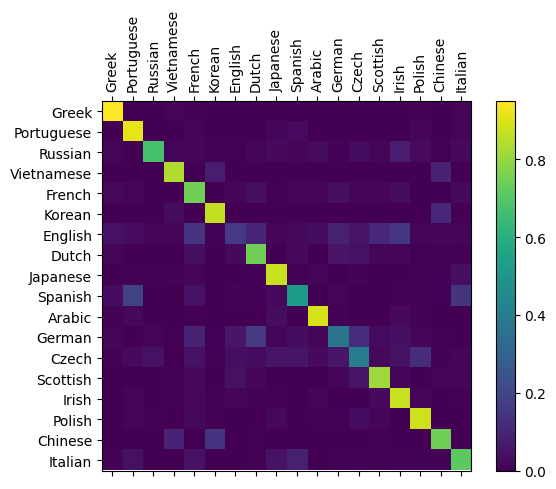

In [ ]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)  # Initialize an empty confusion matrix
n_confusion = 10000  # Number of examples to evaluate for the confusion matrix

import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import matplotlib.ticker as ticker  # Importing ticker for customizing ticks

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()  # Initialize the hidden state

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)  # Pass each character in the line through the RNN

    return output  # Return the final output of the RNN

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()  # Get a random training example
    output = evaluate(line_tensor)  # Evaluate the line tensor
    guess, guess_i = categoryFromOutput(output)  # Get the guessed category and its index
    category_i = all_categories.index(category)  # Get the true category index
    confusion[category_i][guess_i] += 1  # Increment the corresponding cell in the confusion matrix

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()  # Normalize each row

# Set up plot
fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111)  # Add a subplot to the figure
cax = ax.matshow(confusion.numpy())  # Display the confusion matrix as an image
fig.colorbar(cax)  # Add a color bar to the figure

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)  # Set x-axis labels with rotation
ax.set_yticklabels([''] + all_categories)  # Set y-axis labels

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set x-axis major ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))  # Set y-axis major ticks
plt.show()  # Show the plot

In [ ]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


In [ ]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.92) Russian
(-1.49) Czech
(-1.99) English

> Jackson
(-0.12) Scottish
(-2.82) English
(-4.11) Dutch

> Satoshi
(-0.09) Japanese
(-3.09) Italian
(-3.87) Polish
